In [1]:
# Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

# For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

# Has the network latency gone up since we switched internet service providers?
# Is the website redesign any good?
# Is our television ad driving more sales?

In [2]:
# Ho: Latency hasn't changed or is less than that before the switch of isp

# Ha: Latency has gone up after the switch


# True Positive

# low p-value
# Ho is false, reject Ho, latency has gone up
# avg latency after the switch is higher than the average latency before the switch


# False Positive

# low p-value
# Ho is false, reject Ho
# a significant difference found in latency prior to and after
# we found the latency prior was lower than our measured, external factors impact latency
# server crash, downloads, many users etc

# False Negative

# Ho is true , failed to reject
# high p-value
# we found the latency to be equal, sampling bias, technology, time of day of test

    
# # True Negative
# high p-value
# Ho is true, failed to reject
# Latency has stayed the same or gone down

In [3]:
# Is the website redesign any good?

# Ho: Traffic has stayed the same or got worse

# Ha: Traffic has statistically increased significantly


# True Positive

# low p-value
# Ho is rejected and false, 
# Traffic has statistically increased significantly



# False Positive

# low p-value
# Ho is rejected and true 
# traffic increased, due to external factors, holiday season


# False Negative

# Ho is accepted
# high p-value
# traffic looked like it stayed the same, sample size

    
# # True Negative
# high p-value
# Ho is true, failed to be rejected
# traffic stayed the same or went down, bad design

In [4]:
# Is our television ad driving more sales?

# Ho: sales have remained the same or decreased

# Ha: sales have statistically increased, significantly


# True Positive

# low p-value
# Ho is rejected and false
# sales has statistically increased, significantly



# False Positive

# low p-value
# Ho is rejected and true 
# sales increased, due to external factors


# False Negative

# Ho is accepted
# high p-value
# sales looked like it stayed the same, but they didnt, sample size

    
# # True Negative
# high p-value
# Ho is true, failed to be rejected
# sales stayed the same, tv ad was a flop

In [5]:
 %matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from env import user, host, password
from scipy import stats
import csv

np.random.seed(29)

In [6]:
# Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices.
# A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days.
# A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days.
# Use a .05 level of significance.

In [7]:
sample_1 = stats.norm(90, 15).rvs(40)
sample_2 = stats.norm(100, 20).rvs(50)

stats.ttest_ind(sample_1,sample_2)

# Average time is different, p-value of 0.0015

Ttest_indResult(statistic=-0.9818269584843405, pvalue=0.32887677054120024)

In [8]:
from pydataset import data

data = data('mpg')

df = pd.DataFrame(data)

df2 = df.assign(average_gas = (df.cty + df.hwy)/2)
Gas_1999 = df2[df2.year == 1999].average_gas
Gas_2008 = df2[df2.year == 2008].average_gas

stats.ttest_ind(Gas_1999, Gas_2008)

Ttest_indResult(statistic=0.21960177245940962, pvalue=0.8263744040323578)

<AxesSubplot:>

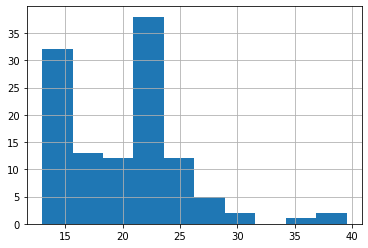

In [9]:
Gas_1999.hist()

<AxesSubplot:>

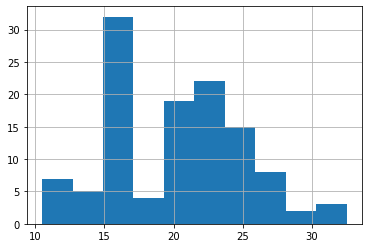

In [10]:
Gas_2008.hist()

In [11]:
compact = df2[df2['class'] == 'compact'].average_gas
not_compact = df2[df2['class'] != 'compact'].average_gas
not_compact

compact_test = stats.ttest_ind(compact, not_compact)
compact_test

Ttest_indResult(statistic=6.731177612837954, pvalue=1.3059121585018135e-10)

In [12]:
x = data.displ
y = data.cty

stats.pearsonr(x,y)

(-0.7985239689348549, 4.737914890206176e-53)

In [13]:
null_hypothesis = "The fuel efficiency is the same for the '99 & '08 vehicles."
alternative_hypothesis = "The fuel efficiency for '99 & '08 vehicles is different."
confidence_level = .95
a = 1 - confidence_level 


In [14]:
t, p = stats.ttest_ind(Gas_1999, Gas_2008)
t, p

(0.21960177245940962, 0.8263744040323578)

In [15]:
if p < a:
    print("We reject the null hypothesis that fuel efficiency is the same for the '99 & '08 vehicles.")
else:
    print("We fail to reject the null hypothesis")
    print("Not enough evidence to support the claim that fuel efficiency for '99 & '08 vehicles is different.")

We fail to reject the null hypothesis
Not enough evidence to support the claim that fuel efficiency for '99 & '08 vehicles is different.


In [16]:
Gas_1999.mean(), Gas_2008.mean()

(20.22222222222222, 20.076923076923077)

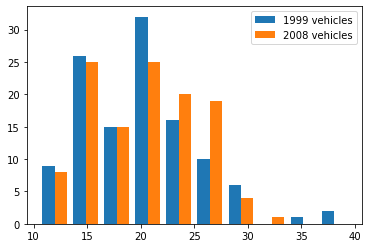

In [17]:
plt.hist([Gas_1999, Gas_2008], label=["1999 vehicles", "2008 vehicles"])
plt.legend(loc="upper right")

In [18]:
#Are compact cars more fuel-efficient than the average car?
compact = df2[df2['class'] == 'compact'].average_gas
not_compact = df2[df2['class'] != 'compact'].average_gas
not_compact

compact_test = stats.ttest_ind(compact, not_compact)
compact_test

Ttest_indResult(statistic=6.731177612837954, pvalue=1.3059121585018135e-10)

In [19]:
if (p/2) < a and t > 0:
    print("We reject the null hypothesis that there is not a difference in compact & average vehicle fuel efficiency.")
else:
    print("We fail to reject the null hypothesis")
    print("We don't have enough evidence to support the claim that", alternative_hypothesis)

We fail to reject the null hypothesis
We don't have enough evidence to support the claim that The fuel efficiency for '99 & '08 vehicles is different.


In [20]:
# Q1. Load “Cust_Churn_Telco.csv” data. Using this data answer the following questions:

In [21]:
telco = pd.read_csv("Telco_Churn.csv")
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
# Is the mean of monthly charges of customers who churn significantly higher than the mean across all customers?


In [23]:
curr_customer = telco[telco.Churn == "No"]
churned_customer = telco[telco.Churn == "Yes"]

<AxesSubplot:>

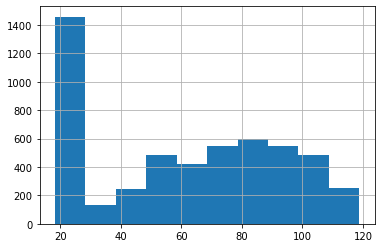

In [24]:
curr_customer.MonthlyCharges.hist()


<AxesSubplot:>

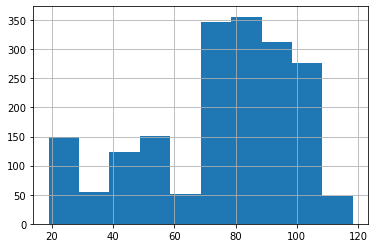

In [25]:
churned_customer.MonthlyCharges.hist()

<AxesSubplot:>

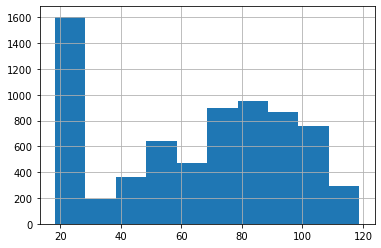

In [26]:
telco.MonthlyCharges.hist()

In [27]:
null_hypothesis = "No difference between churned customers' monthly charges and monthly charges across all customers."
alternative_hypothesis = "Churned customers' monthly charges were higher than monthly charges across all customers."
confidence_level = .95
a = 1 - confidence_level 

In [28]:
t, p = stats.ttest_ind(churned_customer.MonthlyCharges, telco.MonthlyCharges)
t, p

(12.811618012755936, 3.0059436290936687e-37)

In [29]:
if (p/2) < a and t > 0:
    print("We reject the null hypothesis that there is not a difference between churned customers' monthly charges and monthly charges across all customers.")
else:
    print("We fail to reject the null hypothesis")
    print("We don't have enough evidence to support the claim that", alternative_hypothesis)

We reject the null hypothesis that there is not a difference between churned customers' monthly charges and monthly charges across all customers.


In [30]:
# Is the mean of monthly charges of customers who churn significantly higher than the mean of those who don't churn?


In [31]:
null_hypothesis = "No difference between churned customers' monthly charges and current customers."
alternative_hypothesis = "Churned customers' monthly charges were higher than monthly charges across all customers'."
confidence_level = .95
a = 1 - confidence_level 

In [32]:
t, p = stats.ttest_ind(churned_customer.MonthlyCharges, curr_customer.MonthlyCharges)
t, p

(16.53673801593631, 2.706645606888261e-60)

In [33]:
if (p/2) < a and t > 0:
    print("We reject the null hypothesis that there is not a difference between churned customers' monthly charges and current customers'.")
else:
    print("We fail to reject the null hypothesis")
    print("We don't have enough evidence to support the claim that", alternative_hypothesis)

We reject the null hypothesis that there is not a difference between churned customers' monthly charges and current customers'.


In [34]:

# CORRELATION EXERCISES
# 1. Use the telco_churn data.
# 1a. Does tenure correlate with monthly charges?

In [35]:

null_hypothesis = "No correlation between customers' tenure and monthly charges."
alternative_hypothesis = "There IS a correlation between customers' tenure and monthly charges."
confidence_level = .95
a = 1 - confidence_level 

In [36]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:

# CORRELATION EXERCISES
# 1. Use the telco_churn data.
# 1a. Does tenure correlate with monthly charges?

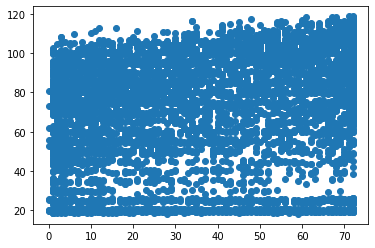

In [38]:
x = telco.tenure
y = telco.MonthlyCharges
plt.scatter(x, y)

In [39]:
corr, p = stats.pearsonr(x,y)
corr, p

(0.24789985628615252, 4.094044991483017e-99)

In [40]:
print(f"No, there is not a strong correlation between Tenure & Monthly Charges, correlation is {round(corr, 2)}")


No, there is not a strong correlation between Tenure & Monthly Charges, correlation is 0.25


In [41]:
corr, p = stats.pearsonr(x,y)
if p < a:
    print(f"Reject null statment: {null_hypothesis}")
    print("There is a linear relationship.")
else: 
    print("Fail to reject the null hypothesis.")
corr, p

Reject null statment: No correlation between customers' tenure and monthly charges.
There is a linear relationship.


(0.24789985628615252, 4.094044991483017e-99)

In [42]:
#1b. Total charges?

In [43]:
totalcharges = telco.TotalCharges.dropna()
totalcharges.count()

7032

In [44]:
est_tenure = telco.tenure != 0
est_tenure.count()

7043

In [45]:
telco = telco.dropna()
telco.count()

customerID          7032
gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
tenure              7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
Churn               7032
dtype: int64

In [46]:
telco.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [47]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [48]:
null_hypothesis = "No correlation between customers' tenure and total charges."
alternative_hypothesis = "There IS a correlation between customers' tenure and total charges."
confidence_level = .95
a = 1 - confidence_level 

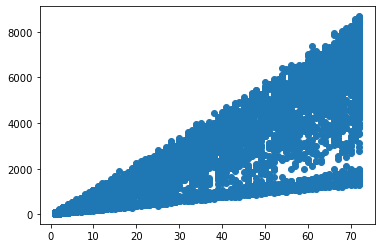

In [49]:
x1 = telco.tenure
y1 = telco.TotalCharges
plt.scatter(x1, y1)

In [50]:
corr, p = stats.pearsonr(x1, y1)
corr, p

(0.8258804609332093, 0.0)

In [51]:
print(f"Yes, there is a positive correlation of {round(corr, 2)} between tenure and total charges.")

Yes, there is a positive correlation of 0.83 between tenure and total charges.


In [52]:
corr, p = stats.pearsonr(x1,y1)
if p < a:
    print(f"Reject null statment: {null_hypothesis}")
    print("There is a linear relationship.")
else: 
    print("Fail to reject the null hypothesis.")
corr, p

Reject null statment: No correlation between customers' tenure and total charges.
There is a linear relationship.


(0.8258804609332093, 0.0)

In [53]:
# 1c. What happens if you control for phone and internet service?

In [54]:
ph_net = telco[(telco.PhoneService == "Yes") & (telco.InternetService != "No")]
ph_net.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No


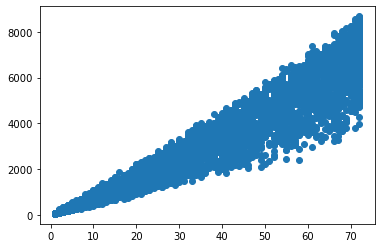

In [55]:
plt.scatter(ph_net.tenure, ph_net.TotalCharges)

In [56]:
null_hypothesis = "No correlation between phone & internet customers' tenure and total charges."
alternative_hypothesis = "There IS a correlation between phone & internet customers' tenure and total charges."
confidence_level = .95
a = 1 - confidence_level 

In [58]:
corr, p = stats.pearsonr(ph_net.tenure, ph_net.TotalCharges)
if p < a:
    print(f"Reject null statment: {null_hypothesis}")
    print("There is a linear relationship.")
else: 
    print("Fail to reject the null hypothesis.")
corr, p

Reject null statment: No correlation between phone & internet customers' tenure and total charges.
There is a linear relationship.


(0.957922977802917, 0.0)

In [59]:
print(f"Yes, there is a strong correlation of {round(corr, 2)} between phone & internet customers and total charges.")

Yes, there is a strong correlation of 0.96 between phone & internet customers and total charges.


In [60]:
# 2. Use the employees database.
# 2a. Is there a relationship between how long an employee has been with the company and their salary?

In [61]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [62]:
query = """
SELECT	first_name, 
		last_name, 
		hire_date, 
		salary, 
		DATEDIFF(NOW(), hire_date) AS "tenure"
FROM salaries AS s
    JOIN employees AS emps
        ON emps.emp_no = s.emp_no
WHERE s.to_date > NOW();

"""


curremp = pd.read_sql(query, url)
curremp.head()

,first_name,last_name,hire_date,salary,tenure
0,Georgi,Facello,1986-06-26,88958,13151
1,Bezalel,Simmel,1985-11-21,72527,13368
2,Parto,Bamford,1986-08-28,43311,13088
3,Chirstian,Koblick,1986-12-01,74057,12993
4,Kyoichi,Maliniak,1989-09-12,94692,11977


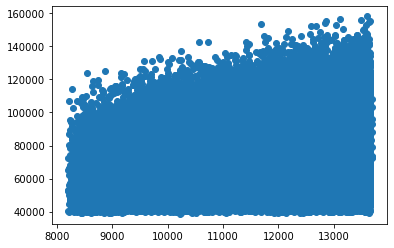

In [63]:
plt.scatter(curremp.tenure, curremp.salary)

In [64]:
null_hypothesis = "No correlation between employees' tenure and salary."
alternative_hypothesis = "There IS a correlation between employees' tenure and salary."
confidence_level = .95
a = 1 - confidence_level 

In [65]:
corr, p = stats.pearsonr(curremp.tenure, curremp.salary)
if p < a:
    print(f"Reject null statment: {null_hypothesis}")
    print("There is a linear relationship.")
else: 
    print("Fail to reject the null hypothesis.")
corr, p

Reject null statment: No correlation between employees' tenure and salary.
There is a linear relationship.


(0.30646256131860894, 0.0)

In [66]:

print(f"No, there is NOT a positive correlation, but a weak correlation of {round(corr, 2)} between tenure and salary.")

No, there is NOT a positive correlation, but a weak correlation of 0.31 between tenure and salary.


In [ ]:
# 2b. Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [67]:
query1 = """
SELECT first_name,
		last_name,
		COUNT(title) AS num_titles,
		DATEDIFF(NOW(), hire_date) AS tenure
FROM titles AS t
    JOIN employees AS emps
    	using(emp_no)
GROUP BY t.emp_no;
"""

temps = pd.read_sql(query1, url)
temps.head()

,first_name,last_name,num_titles,tenure
0,Georgi,Facello,1,13151
1,Bezalel,Simmel,1,13368
2,Parto,Bamford,1,13088
3,Chirstian,Koblick,2,12993
4,Kyoichi,Maliniak,2,11977


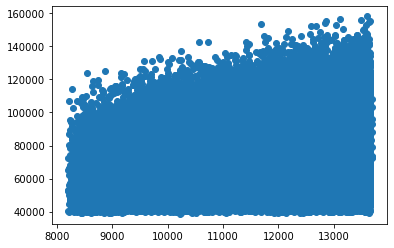

In [68]:
plt.scatter(curremp.tenure, curremp.salary)

In [69]:
null_hypothesis = "No correlation between employees' tenure and number of titles held."
alternative_hypothesis = "There IS a correlation between employees' tenure and number of titles held."
confidence_level = .95
a = 1 - confidence_level 

In [70]:
corr, p = stats.pearsonr(curremp.tenure, curremp.salary)
if p < a:
    print(f"Reject null statment: {null_hypothesis}")
    print("There is a linear relationship.")
else: 
    print("Fail to reject the null hypothesis.")
corr, p

Reject null statment: No correlation between employees' tenure and number of titles held.
There is a linear relationship.


(0.30646256131860894, 0.0)

In [71]:
print(f"No, there is NOT a strong, but a weak correlation of {round(corr, 2)} between tenure and number of titles held.")

No, there is NOT a strong, but a weak correlation of 0.31 between tenure and number of titles held.


In [ ]:
# 3. Use the sleepstudy data.
# Is there a relationship between days and reaction time?

In [72]:
import bambi as bmb
sleepdata = bmb.load_data("sleepstudy")
sleepdata

WARNING (aesara.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.


Could not locate executable g77
Could not locate executable f77
Could not locate executable ifort
Could not locate executable ifl
Could not locate executable f90
Could not locate executable DF
Could not locate executable efl
Could not locate executable gfortran
Could not locate executable f95
Could not locate executable g95
Could not locate executable efort
Could not locate executable efc
Could not locate executable flang
don't know how to compile Fortran code on platform 'nt'


WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


,Reaction,Days,Subject
0,249.5600,0,308
1,258.7047,1,308
2,250.8006,2,308
3,321.4398,3,308
4,356.8519,4,308
...,...,...,...
175,329.6076,5,372
176,334.4818,6,372
177,343.2199,7,372
178,369.1417,8,372


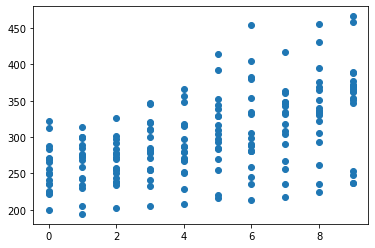

In [75]:
x3 = sleepdata.Days
y3 = sleepdata.Reaction
plt.scatter(x3, y3)

In [76]:
null_hypothesis = "No correlation between days without sleep and reaction time."
alternative_hypothesis = "There IS a correlation between days without sleep and reaction time."
confidence_level = .95
a = 1 - confidence_level 

In [77]:
corr, p = stats.pearsonr(x3,y3)
if p < a:
    print(f"Reject null statment: {null_hypothesis}")
    print("There is a linear relationship.")
else: 
    print("Fail to reject the null hypothesis.")
corr, p

Reject null statment: No correlation between days without sleep and reaction time.
There is a linear relationship.


(0.5352302262650253, 9.894096322214812e-15)

In [80]:
print(f"There is a weak correlation of {round(corr, 2)} between days without sleep and reaction time.")

There is a weak correlation of 0.54 between days without sleep and reaction time.


In [ ]:
# # Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? 
# # What happens if you control for phone and internet service?




# def get_db_url(username, hostname, password, db_name):
#     return f'mysql+pymysql://{username}:{password}@{hostname}/{db_name}'

# query = '''
#     select tenure, monthly_charges from customers
# '''

# url = get_db_url(user,host,password,'telco_churn')
# charges = pd.read_sql(query,url)
# x = charges.tenure
# y = charges.monthly_charges

# stats.pearsonr(x,y)

In [ ]:
# # Total charges?

# charges = pd.read_csv('telco_churn.csv', index_col=0)

# charges
# charges.dtypes
# charges.dtypes
# charges.total_charges.fillna(0, inplace = True)
# charges.Tenure_2.fillna(0, inplace = True)
# charges[charges.total_charges.isnull() == True]

# x = charges.Tenure_2

# y = charges.total_charges


# stats.pearsonr(x, y)